### Example of Stochastic Gradient Descent in Sklearn

In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

In [50]:
# csv file into dataframe 
df = pd.read_csv("ClassSurvey.csv")
df = df.drop(df.columns[1:5],axis=1)
df = df.drop(df.columns[16:19],axis=1)
df

,Timestamp,I am an international student,Address,Zipcode,House Type,Year,Parking,FromSchool,Price,Zestimate,TimeOnZillow,TaxAssessment,PropTaxValue,Bedrooms,Bathrooms,SqrtFt
0,1/23/2023 10:47,Yes,8 Prestwick,23188,House,1987,5,8.0,1199000,1179816,16,705700,5928,5,4,6854
1,1/23/2023 21:15,No,6147 S Mayfair Cir,23188,House,2001,2,5.6,435000,432500,4,294800,2476,3,3,2178
2,1/24/2023 8:12,No,327 Wilkinson Dr,23188,House,2022,2,6.4,724900,724900,38,65000,517,4,4,3207
3,1/24/2023 8:14,No,126 Four Mile Tree,23188,House,1968,2,12.5,1170000,1151400,63,715400,6009,4,3,2766
4,1/24/2023 8:14,No,414 Mershon Way,23185,House,2017,2,1.9,390000,377000,33,293200,2331,3,3,1905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1/24/2023 23:19,No,1573 River Rdg,23185,House,2003,4,9.8,1949000,1919500,182,1702500,1702500,4,8,7261
65,1/25/2023 10:54,No,103 The Maine,23185,House,1977,1,4.6,349000,349000,70,183800,1544,3,2,1461
66,1/25/2023 18:36,No,126 Four Mile Tree,23188,House,1968,2,12.7,1170000,1151400,65,715400,6009,4,3,2766
67,1/25/2023 19:33,Yes,Liberty Ridge,23188,House,2023,2,8.3,969990,0,20,0,6984,4,4,4438


In [65]:
X = np.array(df['Bedrooms']).reshape(-1, 1) #To turn X into a 2D array to successfully perform regression fit.
#print(X)
y = np.array(df['Price'])
#print(y)
# Create an instance of SGDRegressor
reg = SGDRegressor()

# Fit the model on the data
reg.fit(X, y)

# Predict values for new data
new_data = np.array([[4]]) # input value to predict; in this case 4 bedrooms.
prediction = float(reg.predict(new_data))
print(type(prediction))

print("Prediction for new data:", "${:.2f}".format(prediction))

<class 'float'>
Prediction for new data: $940549.29


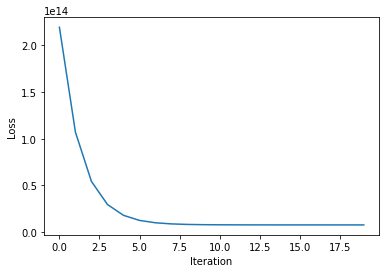

In [52]:
# Define a loss function
def loss_function(X, y, w, b):
    N = X.shape[0]
    prediction = X @ w + b
    loss = (1/N) * np.sum((prediction - y)**2)
    return loss

# Initialize parameters
w = np.random.randn(1,1)
b = np.random.randn()

# Gradient descent
num_iterations = 20
learning_rate = 0.01
losses = []
for i in range(num_iterations):
    # Compute the prediction and loss
    prediction = X @ w + b
    loss = loss_function(X, y, w, b)
    losses.append(loss)
    
    # Compute the gradient
    N = X.shape[0]
    dLdw = (2/N) * X.T @ (prediction - y)
    dLdb = (2/N) * np.sum(prediction - y)
    
    # Update the parameters
    w = w - learning_rate * dLdw
    b = b - learning_rate * dLdb

# Plot the losses over time
plt.plot(np.arange(num_iterations), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


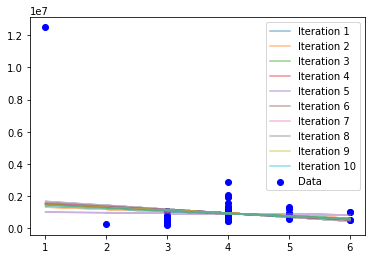

In [53]:
# Initialize the SGDRegressor model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)

# Plot the data
plt.scatter(X, y, c='blue', label='Data')

# Fit the SGDRegressor model to the data
for i in range(10):
    sgd_reg.fit(X, y)
    y_pred = sgd_reg.predict(X)
    
    # Plot the regression line for each iteration
    plt.plot(X, y_pred, label='Iteration {}'.format(i + 1), alpha=0.5)

# Show the plot
plt.legend()
plt.show()
